https://www.newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python

To perform similarity measures we will use:

Paragraph 1: The autumn leaves crunched underfoot as I strolled through the park. Sunlight dappled through the golden canopy, casting a warm glow on the fallen leaves. Birds chirped merrily in the branches, and the air held a crisp, exhilarating chill. It was a perfect day to savor the changing seasons.

Paragraph 2: The wind whipped through the barren trees, rustling the few remaining leaves with a skeletal rattle. Grey clouds scudded across the sky, mirroring the stark landscape below. Beneath my feet, the cold, damp earth yielded with each step. A lone crow cawed mournfully, echoing the melancholic mood of the fading autumn.

Text similarity (Jaccard, Euclidean, Cosine)

Jaccard index, also known as Jaccard similarity coefficient,  treats the data objects like sets. It is defined as the size of the intersection of two sets divided by the size of the union.

In [1]:
para01 = "The autumn leaves crunched underfoot as I strolled through the park. Sunlight dappled through the golden canopy, casting a warm glow on the fallen leaves. Birds chirped merrily in the branches, and the air held a crisp, exhilarating chill. It was a perfect day to savor the changing seasons."
para02 = "The wind whipped through the barren trees, rustling the few remaining leaves with a skeletal rattle. Grey clouds scudded across the sky, mirroring the stark landscape below. Beneath my feet, the cold, damp earth yielded with each step. A lone crow cawed mournfully, echoing the melancholic mood of the fading autumn."
print(para01)
print(para02)

The autumn leaves crunched underfoot as I strolled through the park. Sunlight dappled through the golden canopy, casting a warm glow on the fallen leaves. Birds chirped merrily in the branches, and the air held a crisp, exhilarating chill. It was a perfect day to savor the changing seasons.
The wind whipped through the barren trees, rustling the few remaining leaves with a skeletal rattle. Grey clouds scudded across the sky, mirroring the stark landscape below. Beneath my feet, the cold, damp earth yielded with each step. A lone crow cawed mournfully, echoing the melancholic mood of the fading autumn.


In [2]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [3]:
sentences = [para01,para02]
sentences = [sent.lower().split(" ") for sent in sentences]
jaccard_similarity(sentences[0], sentences[1])

0.05128205128205128

Euclidean distance, or L2 norm, is the most commonly used form of the Minkowski distance. It uses the Pythagoras theorem to calculate the distance between two points

In [4]:
from math import sqrt, pow, exp

def squared_sum(x):
  """ return 3 rounded square rooted value """

  return round(sqrt(sum([a*a for a in x])),3)

def euclidean_distance(x,y):
  """ return euclidean distance between two lists """

  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [6]:
sentences01 = [para01,para02]

In [7]:
embeddings = [nlp(sentence).vector for sentence in sentences01]

distance = euclidean_distance(embeddings[0], embeddings[1])
print(distance)

1.0199033920803693


In [8]:
def distance_to_similarity(distance):
  return 1/exp(distance)

distance_to_similarity(distance)

0.3606297781828645

Cosine Similarity computes the similarity of two vectors as the cosine of the angle between two vectors. It determines whether two vectors are pointing in roughly the same direction. So if the angle between the vectors is 0 degrees, then the cosine similarity is 1.

In [9]:
def cos_similarity(x,y):
  """ return cosine similarity between two lists """

  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

cos_similarity(embeddings[0], embeddings[1])

0.899

Embedding methods


One-Hot Encoding & Bag-of-Words



In [10]:
headlines = [
#Crypto
'Investors unfazed by correction as crypto funds see $154 million inflows',
'Bitcoin, Ethereum prices continue descent, but crypto funds see inflows',

#Inflation
'The surge in euro area inflation during the pandemic: transitory but with upside risks',
"Inflation: why it's temporary and raising interest rates will do more harm than good",

#common
'Will Cryptocurrency Protect Against Inflation?']

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels = [headline[:20] for headline in headlines]

def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

countvectorizer

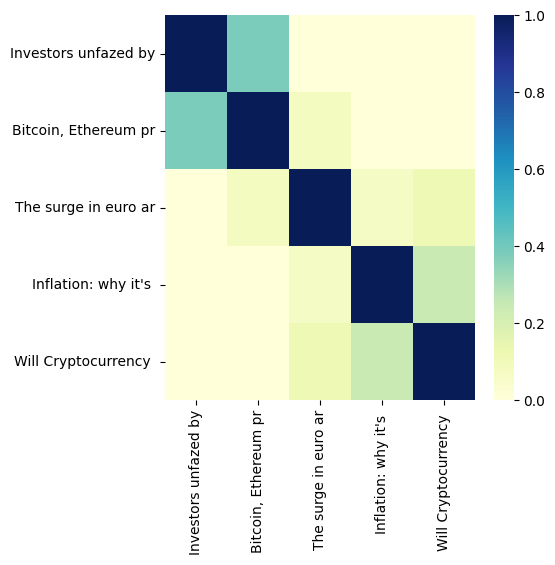

In [12]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(headlines)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

TF-IDF : TF-IDF vectors are an extension of the one-hot encoding model. Instead of considering the frequency of words in one document, the frequency of words across the whole corpus is taken into account. The big idea is that words that occur a lot everywhere carry very little meaning or significance. For instance, trivial words like “and”, “or”, “is” don’t carry as much significance as nouns and proper nouns that occur less frequently.

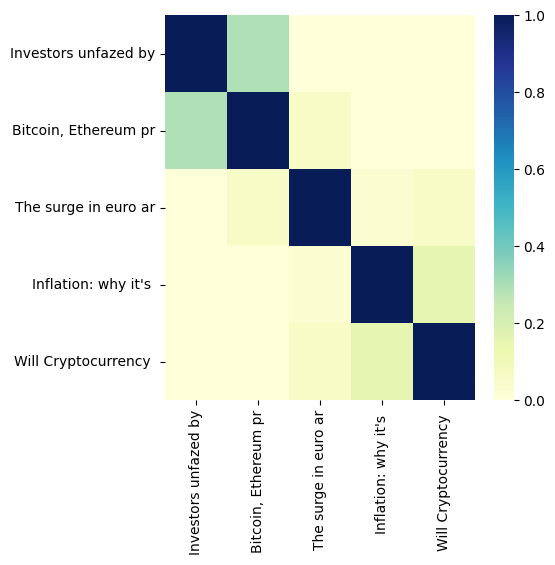

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(headlines)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))

Word2Vec is a predictive method for forming word embeddings. Unlike the previous methods that need to be “trained” on the working corpus, Word2Vec is a pre-trained two-layer neural network. It takes as input the text corpus and outputs a set of feature vectors that represent words in that corpus.

In [14]:
!pip install spacy

In [15]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
docs = [nlp(headline) for headline in headlines]

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:

print(docs[0].vector)

[-0.06898086 -0.0035319   0.00457341  0.21286501  0.8917324  -0.6707699
  0.44194517  0.49310437  0.01792558 -0.5719372  -0.20877437 -0.07785162
 -0.43605193 -0.0366856  -0.06501301  0.253569   -0.5516508   0.85701746
 -0.45397964  0.22146751 -0.276772   -0.26957294  0.16201991 -0.13757579
  0.20225354 -0.26942196  0.45843315  0.4627041   0.23106204 -0.06104018
  0.22449039 -0.28959703  0.14035486  0.06656654 -0.41680714 -0.07204774
 -0.05963308  0.33429193 -0.16968958 -0.14120546 -0.6190099   0.19944932
  0.00943561 -0.08511579  0.12140309  0.27629435 -0.12748243  0.07332729
  0.19062887 -0.39367923 -0.39627674 -0.01455165  0.53429586 -0.45441452
 -0.06621829  0.2550293  -0.04398391 -0.55678934  0.727644   -0.16273938
 -0.19140606 -0.11998764  0.11333269 -0.39052776  0.18812537 -0.25285676
 -0.0949134   0.24590366  0.16043872  0.07956215  0.52043     0.12832528
  0.05392264 -0.0080184  -0.01041094  0.17508082 -0.05302449 -0.66898084
 -0.04276108 -0.39352116 -0.23838763  0.15100245  0.

<ipython-input-17-fd858580fc86>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  row.append(docs[i].similarity(docs[j]))


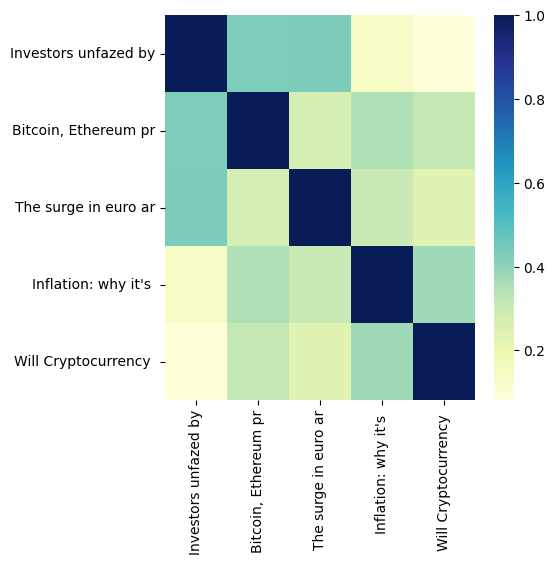

In [17]:
similarity = []
for i in range(len(docs)):
    row = []
    for j in range(len(docs)):
      row.append(docs[i].similarity(docs[j]))
    similarity.append(row)
create_heatmap(similarity)

Contextual Embedding

The Doc2Vec model (or Paragraph Vector) extends the idea of the Word2Vec algorithm. The algorithm follows the assumption that a word’s meaning is given by the words that appear close by.

In [18]:
import gensim
import gensim.downloader as api
dataset = api.load("text8")
data = [i for i in dataset]

[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:

def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

training_data = list(tagged_document(data))
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)

model.build_vocab(training_data)
model.train(training_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
vectors = [model.infer_vector([word for word in sent]).reshape(1,-1) for sent in sentences]

similarity = []
   for i in range(len(sentences)):
       row = []
       for j in range(len(sentences)):
          row.append(cosine_similarity(vectors[i],vectors[j])[0][0])
       similarity.append(row)

create_heatmap(similarity)